# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Hand written digit recognition

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

### Dataset MNIST

In [ ]:
"""
The dataset was constructed from a number of scanned document datasets available from the National Institute 
of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST 
or MNIST dataset
"""

### Loading the MNIST dataset in Keras

In [ ]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( "gray" ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( "gray" ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( "gray" ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( "gray" ))

# show the plot
plt.show()

### Baseline Model with Multilayer Perceptrons

In [ ]:
"""
DO YOU REALLY NEED a complex model like a convolutional neural network to get the best results with MNIST?
You can get good results using a very simple neural network model with a single hidden layer. In this 
section we will create a simple Multilayer Perceptron model that achieves an error rate of 1.74%.
""" 

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = "normal" , activation = "relu"))
    model.add(Dense(num_classes, kernel_initializer = "normal" , activation = "softmax" ))
    
    # Compile model
    model.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "accuracy" ])
    return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

### Simple Convolutional Neural Network for MNIST

In [ ]:
"""
In this section we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a 
modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers.

[1] The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, 
    which with the size of 5 x 5 and a rectifier activation function. This is the input layer, expecting 
    images with the structure outline above.
[2] Next we define a pooling layer that takes the maximum value called MaxPooling2D. It is configured with 
    a pool size of 2 x 2.
[3] The next layer is a regularization layer using dropout called Dropout. It is configured to randomly 
    exclude 20% of neurons in the layer in order to reduce overfitting.
[4] Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to 
    be processed by standard fully connected layers.
[5] Next a fully connected layer with 128 neurons and rectifier activation function is used.
[6] Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output
    probability-like predictions for each class.
"""

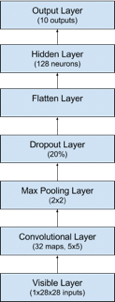

In [ ]:
# see this discussion for an updated API syntax https://github.com/keras-team/keras/issues/12649
#K.set_image_dim_ordering("th")
K.set_image_data_format('channels_last')


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( "float32" )
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( "float32" )

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, input_shape=(1, 28, 28), activation= "relu" ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = "relu" ))
    model.add(Dense(num_classes, activation = "softmax" ))
    # Compile model
    model.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=["accuracy"])
    return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200,verbose = 2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
"""
I DID NOT MANAGED TO MAKE IT WORK!
"""

### Larger Convolutional Neural Network for MNIST

In [ ]:
"""
Now that we have seen how to create a simple CNN, let’s take a look at a model capable of close to 
state-of-the-art results. This time we define a larger CNN architecture with additional convolutional, 
max pooling layers and fully connected layers. The network topology can be summarized as follows.

[1] Convolutional layer with 30 feature maps of size 5 x 5. 
[2] Pooling layer taking the max over 2 x 2 patches.
[3] Convolutional layer with 15 feature maps of size 3 x 3. 
[4] Pooling layer taking the max over 2 x 2 patches.
[5] Dropout layer with a probability of 20%.
[6] Flatten layer.
[7] Fully connected layer with 128 neurons and rectifier activation.
[8] Fully connected layer with 50 neurons and rectifier activation. 
[9] Output layer.
"""

In [ ]:
K.set_image_data_format('channels_first')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( "float32" )
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( "float32" )

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5, 5), input_shape=(1, 28, 28), activation= "relu" ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3, 3), activation= "relu" ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= "relu" ))
    model.add(Dense(50, activation= "relu" ))
    model.add(Dense(num_classes, activation= "softmax" ))
    
    # Compile model
    model.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "accuracy" ])
    return model

# build the model
model = larger_model()


# https://stackoverflow.com/questions/40690598/can-keras-with-tensorflow-backend-be-forced-to-use-cpu-or-gpu-at-will

import tensorflow as tf
# your code here
with tf.device('/cpu:0'):    
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

stop
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
"""
STILL NOT WORKING!!!!
"""

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

</font>
</div>